# TOPIC: Unveiling Lateness with Causal discovery in the industry of train transport.

## Abstract: 
### Train delays have caused frustration and economic losses. While there are plenty of factors that contribute to delays, finding and pinpointing their causal relationships still remains a bit of a challenge. This thesis proposes different investigations by using causal discovery algorithms to come up with a causal diagram explaining these plagues of train punctuality.
##
### By using different data sets that includes, train journeys, dates, and minutes late, we aim to construct an image describing potential delay causes. These will be discovered using Causal discovery with TIGRAMITE

## Introduction
### Train delays have become a critical issue around the world. For example, the Deutsche Bahn interim report has shown that long-distance trains had a punctuality of 65.2% in 2022 and cargo train had a punctuality of 66.1%. The report mentions that the factors contributing to this effect consists of: Poor condition of railroad facilities, Intensive construction activities, High network utilization, adverse weather, etc.
##
### The frequent issues of train delays have had a negative impact on transport and shipping industry. It is important to study the causes of these and identify the primary long-term effect on the industry.  Companies like Deutsche Bahn play a crucial role in facilitating the movement of both goods and people across Germany and beyond. Their delays in Transport services can lead to increased costs for businesses, which disrupts the supply of goods and services.
##
### Machine learning has grown over the year and expanded its development to AI models. While many are very similar with traditional Machine learning which identifies correlations between features, the challenge of understanding the causal relationship between these features remain. This introduces Causal Machine Learning (CausalML). CausalML dives deeper than prediction, but instead allows us to reason about the potential impact on a system should there be an intervention. This gives CausalML the ability to answer questions like “what would happen if … changed to …”  by considering another intervention (in this case a feature/variable being changed).
##
### The purpose of this paper is to use CuasalML to identify structure that pictures relationships between different data that contributes to the rising issue of train delays. Existing research has shown attempts to analyse contributing factors to train delays, however, most have done so with regression models. This has limited the understanding of relationships between data to only predictions, excluding uncovered causal effect which could succeed in providing insights into the impact of treatments on outcomes of train delays.
##

#### ------> MORE TO BE ADDED


### Let's perform out first investivation of CausalML

In [1]:
import tigramite
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite import data_processing as pp
from tigramite.independence_tests.parcorr import ParCorr

ModuleNotFoundError: No module named 'tigramite'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dataset = pd.read_csv('dataset_Train.csv')

#### Here I want to investivate a causal graph that shows how the number of journys can cause how late the train becomes

In [ ]:
train_journeys = dataset.groupby('train')['journeys'].sum()
train_10_journeys = train_journeys.groupby(level=0).head(10)
top_5_trains = train_journeys.nlargest(5)

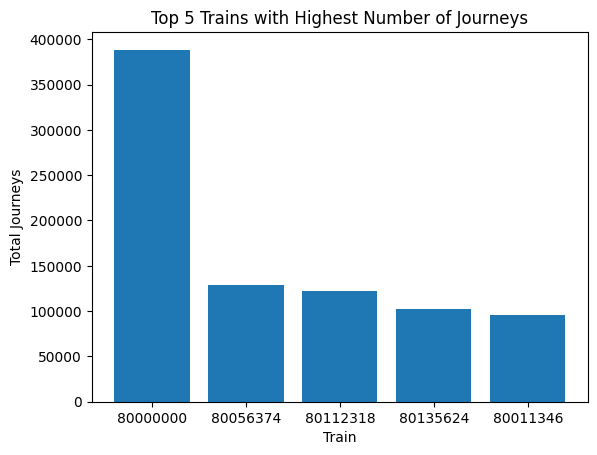

In [ ]:
top_5_trains.index = top_5_trains.index.astype(str)
plt.bar(top_5_trains.index, top_5_trains.values)
plt.xlabel('Train')
plt.ylabel('Total Journeys')
plt.title('Top 5 Trains with Highest Number of Journeys')
plt.show()

In [ ]:
features = ["train", "date", "journeys", "late"]
data = dataset
data = data[features]
## extracting the highest
data = data[data['train'] == 80000000]
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y %H:%M')
data = data.drop(['train'], axis=1)
data['journeys'] = data['journeys'].astype(np.float64)
data['late'] = data['late'].astype(np.float64)

In [ ]:
# making causal discovery
tigramite_data = pp.DataFrame(data[['journeys', 'late']].to_numpy())
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(tigramite_data, cond_ind_test=parcorr)
results = pcmci.run_pcmci(tau_max=5)

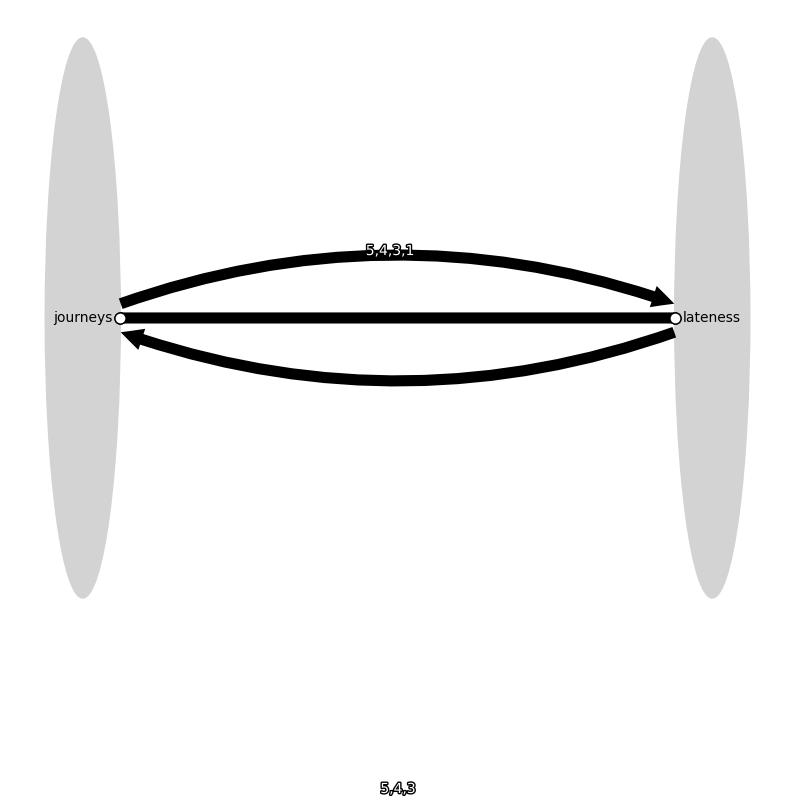

In [ ]:
graph = tp.plot_graph(
    results['graph'],
    var_names=['lateness', 'journeys'],
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False,
    figsize=(10, 8),
)

### To get a better understanding we can consider 1 date to examine more on the effects of the lateness and number of journeys

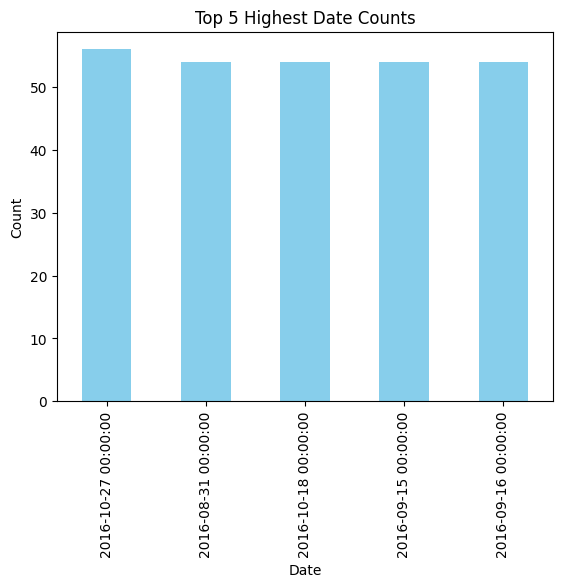

In [ ]:
top_dates = data['date'].value_counts().nlargest(5)
top_dates.plot(kind='bar', color='skyblue')
plt.title('Top 5 Highest Date Counts')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

##### From the above it is best we consider 201

### Interpretation?

#### Mine: any 